In [51]:
import env
import acquire as a
import prepare as p
import functions as f
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df= a.get_zillow()

In [3]:
train, val, test= p.prep_zillow(df)

Train shape:
(1053985, 7)
Validate shape:
(451708, 7)
Test shape:
(376424, 7)


In [4]:
train.head()

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,fips
2010611,1965.0,507733.0,5728.14,3.0,2.0,1923.0,6059.0
1937230,2003.0,551948.0,6295.84,4.0,3.0,2420.0,6111.0
170197,1964.0,657428.0,7338.40,5.0,2.0,1982.0,6059.0
407560,1969.0,271635.0,3150.84,4.0,2.0,1738.0,6059.0
980494,1963.0,69288.0,759.52,3.0,2.0,1561.0,6111.0


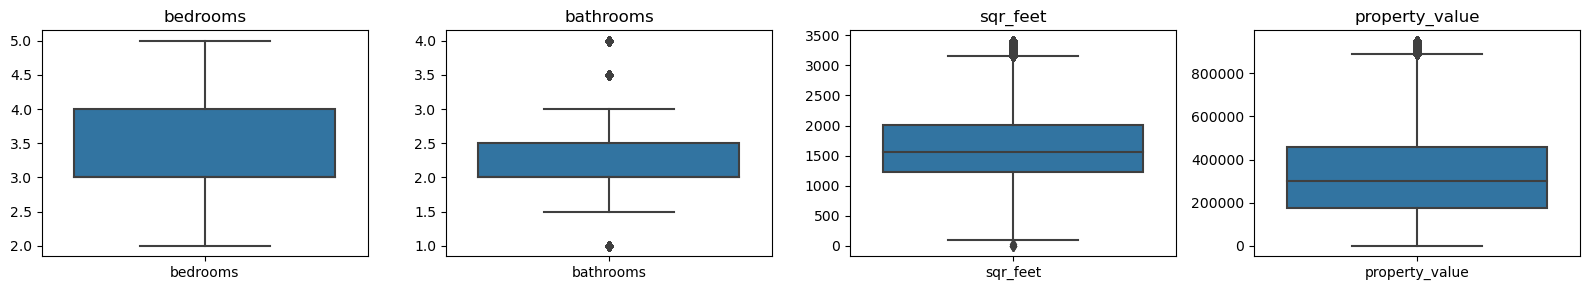

In [5]:
f.plot_box(train)

In [6]:
train.head()

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet,fips
2010611,1965.0,507733.0,5728.14,3.0,2.0,1923.0,6059.0
1937230,2003.0,551948.0,6295.84,4.0,3.0,2420.0,6111.0
170197,1964.0,657428.0,7338.40,5.0,2.0,1982.0,6059.0
407560,1969.0,271635.0,3150.84,4.0,2.0,1738.0,6059.0
980494,1963.0,69288.0,759.52,3.0,2.0,1561.0,6111.0


In [8]:
corr=train.corr()
corr

,year_built,property_value,tax_amount,bedrooms,bathrooms,sqr_feet
year_built,1.000000,0.251903,0.259916,0.367480,0.536096,0.470836
property_value,0.251903,1.000000,0.960275,0.202302,0.363802,0.437176
tax_amount,0.259916,0.960275,1.000000,0.201916,0.362706,0.431883
bedrooms,0.367480,0.202302,0.201916,1.000000,0.581615,0.595352
bathrooms,0.536096,0.363802,0.362706,0.581615,1.000000,0.765456
sqr_feet,0.470836,0.437176,0.431883,0.595352,0.765456,1.000000


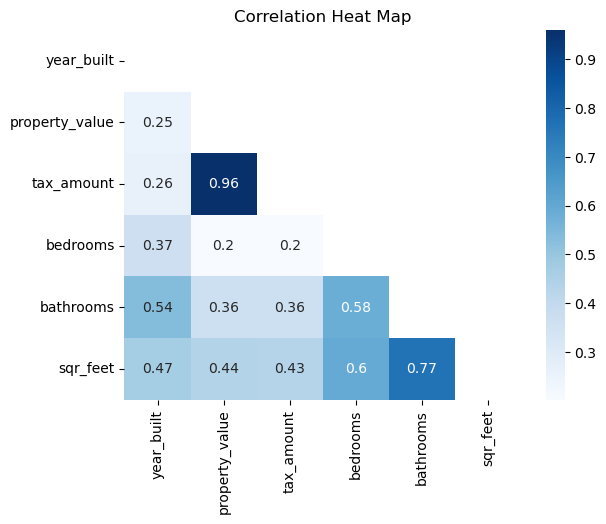

In [14]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Blues', annot=True, mask= mask)
plt.title('Correlation Heat Map')
plt.show()

## Statistical Testing

$H_{o}$: There is no relationship between total Square Feet and Property Value

$H_{a}$: There is a relationship between total Square Feet and Property Value

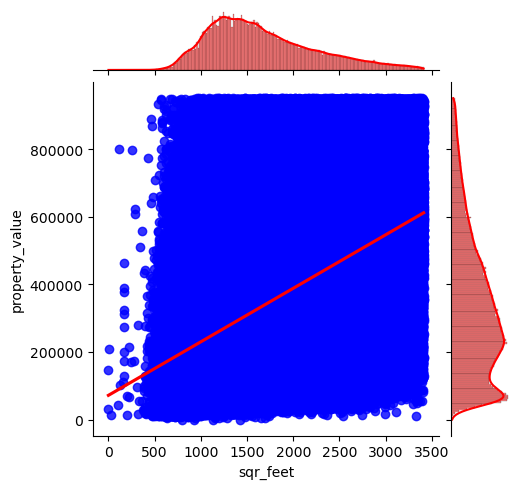

In [19]:
sns.jointplot(x="sqr_feet", y="property_value", data=train,  kind='reg', height=5, color='red',
              joint_kws={'color':'blue'},line_kws={"color": "red"})
plt.xlabel('Total Square Feet')
plt.ylabel('Total Property Value')
plt.show()

In [20]:
r, p_value = pearsonr(train.sqr_feet, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.43717585880902654
P-value: 0.0


- ### Looking at the graph and the results of the stats test, we are able to Reject the Null Hypothesis. Meaning that there is a correlation between Square Feet and Property Value

----

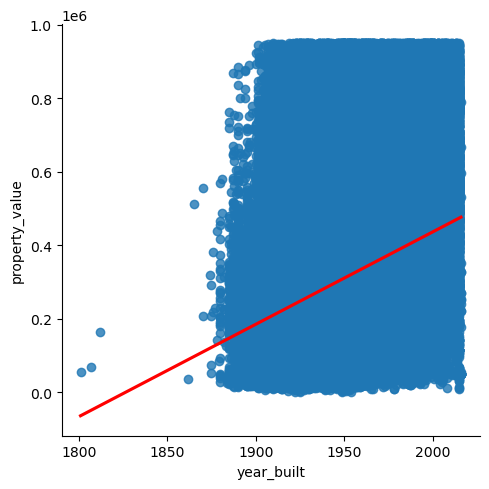

In [46]:
sns.lmplot(x='year_built', y='property_value', data= train, scatter=True, line_kws={"color": "red"})

In [29]:
r, p_value = pearsonr(train.year_built, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.2519029220078279
P-value: 0.0


- ### Looking at the graph and the results of the stats test, we are able to Reject the Null Hypothesis. Meaning that there is a correlation between Year Built and Property Value

----

$H_{o}$: There is no correlation between Bedrooms and Property Value

$H_{a}$: There is a correlation between Bedroom and Property Value

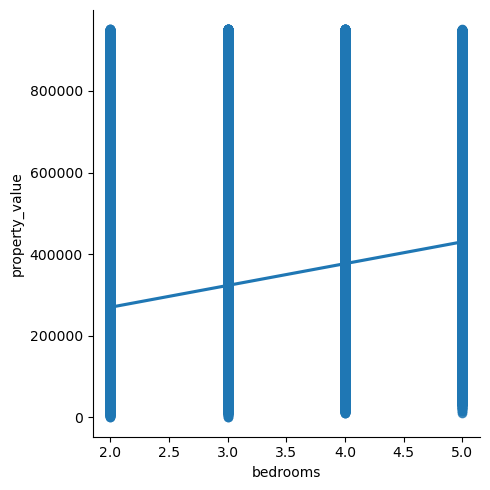

In [26]:
sns.lmplot(x='bedrooms', y='property_value', data= train, scatter=True)

In [24]:
r, p_value = pearsonr(train.bedrooms, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.20230172660177168
P-value: 0.0


- ### Looking at the graph and the results of the stats test, we are able to Reject the Null Hypothesis. Meaning that there is a correlation between Bedrooms and Property Value

$H_{o}$: There is no relationship between Bathrooms and Property Value

$H_{a}$: There is a relationship between Bathrooms and Property Value

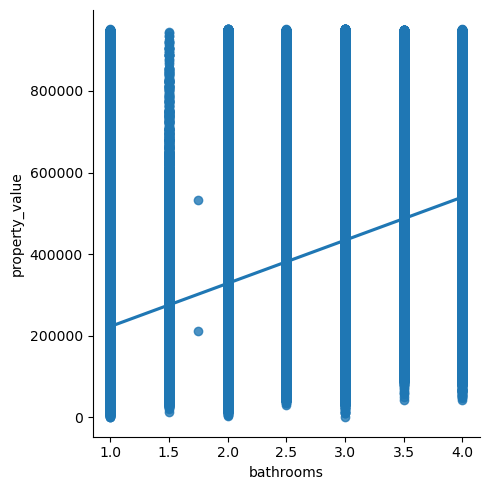

In [27]:
sns.lmplot(x='bathrooms', y='property_value', data= train, scatter=True)

In [28]:
r, p_value = pearsonr(train.bathrooms, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.36380211936690715
P-value: 0.0


- ### Looking at the graph and the results of the stats test, we are able to Reject the Null Hypothesis. Meaning that there is a correlation between Bathrooms and Property Value

## Modeling

In [34]:
X_train = train.drop(columns=['property_value'])
y_train = train.property_value

X_val = val.drop(columns=['property_value'])
y_val = val.property_value

X_test = test.drop(columns=['property_value'])
y_test = test.property_value

In [36]:
X_train.head()

,year_built,tax_amount,bedrooms,bathrooms,sqr_feet,fips,non_bed_bath_area
2010611,1965.0,5728.14,3.0,2.0,1923.0,6059.0,1791.0
1937230,2003.0,6295.84,4.0,3.0,2420.0,6111.0,2294.0
170197,1964.0,7338.40,5.0,2.0,1982.0,6059.0,1562.0
407560,1969.0,3150.84,4.0,2.0,1738.0,6059.0,1462.0
980494,1963.0,759.52,3.0,2.0,1561.0,6111.0,1429.0


In [43]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [48]:
def scale_data(X_train, X_val, X_test):
    

    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    return X_train, X_val, X_test

In [49]:
scale_data(X_train, X_val, X_test)

(         year_built  tax_amount  bedrooms  bathrooms  sqr_feet    fips  \
 2010611      1965.0     5728.14       3.0        2.0    1923.0  6059.0   
 1937230      2003.0     6295.84       4.0        3.0    2420.0  6111.0   
 170197       1964.0     7338.40       5.0        2.0    1982.0  6059.0   
 407560       1969.0     3150.84       4.0        2.0    1738.0  6059.0   
 980494       1963.0      759.52       3.0        2.0    1561.0  6111.0   
 ...             ...         ...       ...        ...       ...     ...   
 2014394      1936.0     1174.64       3.0        1.0    1491.0  6037.0   
 1670922      1988.0     1406.99       4.0        2.0    1300.0  6037.0   
 1045020      1982.0     4506.04       4.0        3.5    2172.0  6111.0   
 1260305      1962.0     1652.22       4.0        1.5    1248.0  6111.0   
 1139777      1952.0     3608.64       2.0        1.0    1265.0  6059.0   
 
          non_bed_bath_area  
 2010611             1791.0  
 1937230             2294.0  
 170197 

In [50]:
X_train, X_val, X_test= scale_data(X_train, X_val, X_test)

In [54]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

# 1. Predict value_pred_mean
value_pred_mean = y_train['property_value'].mean()
y_train['value_pred_mean'] = value_pred_mean
y_val['value_pred_mean'] = value_pred_mean

# 2. compute G3_pred_median
value_pred_median = y_train['property_value'].median()
y_train['value_pred_median'] = value_pred_median
y_val['value_pred_median'] = value_pred_median

# 3. RMSE of G3_pred_mean
rmse_train = mean_squared_error(y_train.property_value, y_train.value_pred_mean)**(1/2)
rmse_val = mean_squared_error(y_val.property_value, y_val.value_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_val, 2))

# 4. RMSE of G3_pred_median
rmse_train = mean_squared_error(y_train.property_value, y_train.value_pred_median)**(1/2)
rmse_val = mean_squared_error(y_val.property_value, y_val.value_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_val, 2))

RMSE using Mean
Train/In-Sample:  207061.12 
Validate/Out-of-Sample:  207046.3
RMSE using Median
Train/In-Sample:  210000.49 
Validate/Out-of-Sample:  210013.04


In [57]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.property_value)

# predict train
y_train['value_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.property_value, y_train.value_pred_lm)**(1/2)

# predict validate
y_val['value_pred_lm'] = lm.predict(X_val_scaled)

# evaluate: rmse
rmse_val = mean_squared_error(y_val.property_value, y_val.value_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_val)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RMSE for OLS using LinearRegression
Training/In-Sample:  55556.796895153966 
Validation/Out-of-Sample:  57156.44569213533


In [61]:
def calc_baseline(y_train,y_val):
    
    """takes in y_train and y_validate data and converts into DataFrames. The mean and median are both calculated and  printed            below along with 
           the RMSE for each
    """
    # We need y_train and y_val to be dataframes to append the new columns with predicted values. 
    y_train= pd.DataFrame(y_train)
    y_val= pd.DataFrame(y_val)

    # 1. Predict value_pred_mean
    value_pred_mean= y_train['property_value'].mean()
    y_train['value_pred_mean']= value_pred_mean
    y_val['value_pred_mean']= value_pred_mean

    # 2. compute value_pred_median
    value_pred_median = y_train['property_value'].median()
    y_train['value_pred_median']= value_pred_median
    y_val['value_pred_median']= value_pred_median

    # 3. RMSE of value_pred_mean
    rmse_train = mean_squared_error(y_train.property_value, y_train.value_pred_mean)**(1/2)
    rmse_val = mean_squared_error(y_val.property_value, y_val.value_pred_mean)**(1/2)

    print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
        "\nValidate/Out-of-Sample: ", round(rmse_val, 2))

    # 4. RMSE of value_pred_median
    rmse_train = mean_squared_error(y_train.property_value, y_train.value_pred_median)**(1/2)
    rmse_val = mean_squared_error(y_val.property_value, y_val.value_pred_median)**(1/2)

    print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
        "\nValidate/Out-of-Sample: ", round(rmse_val, 2))
        
        

In [62]:
calc_baseline(y_train, y_val)

RMSE using Mean
Train/In-Sample:  207061.12 
Validate/Out-of-Sample:  207046.3
RMSE using Median
Train/In-Sample:  210000.49 
Validate/Out-of-Sample:  210013.04
